In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [2]:
#pip install xgboost
import xgboost as xgb

In [3]:
import platform
print("Python : ",platform.python_version())
print("Pandas : ",pd.__version__)
print("XGBoost : ",xgb.__version__)

Python :  3.11.7
Pandas :  2.1.4
XGBoost :  2.0.3


In [4]:
df = pd.read_csv("Fraudulent_E-Commerce_Transaction_Data_2.csv", header=0)
df.head(6)

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,c12e07a0-8a06-4c0d-b5cc-04f3af688570,8ca9f102-02a4-4207-ab63-484e83a1bdf0,42.32,2024-03-24 23:42:43,PayPal,electronics,1,40,East Jameshaven,desktop,110.87.246.85,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,0,282,23
1,7d187603-7961-4fce-9827-9698e2b6a201,4d158416-caae-4b09-bd5b-15235deb9129,301.34,2024-01-22 00:53:31,credit card,electronics,3,35,Kingstad,tablet,14.73.104.153,"5230 Stephanie Forge\nCollinsbury, PR 81853","5230 Stephanie Forge\nCollinsbury, PR 81853",0,223,0
2,f2c14f9d-92df-4aaf-8931-ceaf4e63ed72,ccae47b8-75c7-4f5a-aa9e-957deced2137,340.32,2024-01-22 08:06:03,debit card,toys & games,5,29,North Ryan,desktop,67.58.94.93,"195 Cole Oval\nPort Larry, IA 58422","4772 David Stravenue Apt. 447\nVelasquezside, ...",0,360,8
3,e9949bfa-194d-486b-84da-9565fca9e5ce,b04960c0-aeee-4907-b1cd-4819016adcef,95.77,2024-01-16 20:34:53,credit card,electronics,5,45,Kaylaville,mobile,202.122.126.216,"7609 Cynthia Square\nWest Brenda, NV 23016","7609 Cynthia Square\nWest Brenda, NV 23016",0,325,20
4,7362837c-7538-434e-8731-0df713f5f26d,de9d6351-b3a7-4bc7-9a55-8f013eb66928,77.45,2024-01-16 15:47:23,credit card,clothing,5,42,North Edwardborough,desktop,96.77.232.76,"2494 Robert Ramp Suite 313\nRobinsonport, AS 5...","2494 Robert Ramp Suite 313\nRobinsonport, AS 5...",0,116,15
5,5da506fe-d4df-474a-b773-146333f06cfe,03033baf-2bcc-4608-b5b8-9c86976f4948,345.27,2024-02-22 13:49:27,PayPal,toys & games,1,9,Johnsonmouth,desktop,158.48.161.135,"PSC 3832, Box 5265\nAPO AE 85694","PSC 3832, Box 5265\nAPO AE 85694",0,251,13


In [5]:
df.dtypes

Transaction ID         object
Customer ID            object
Transaction Amount    float64
Transaction Date       object
Payment Method         object
Product Category       object
Quantity                int64
Customer Age            int64
Customer Location      object
Device Used            object
IP Address             object
Shipping Address       object
Billing Address        object
Is Fraudulent           int64
Account Age Days        int64
Transaction Hour        int64
dtype: object

In [6]:
df.head(5)

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,c12e07a0-8a06-4c0d-b5cc-04f3af688570,8ca9f102-02a4-4207-ab63-484e83a1bdf0,42.32,2024-03-24 23:42:43,PayPal,electronics,1,40,East Jameshaven,desktop,110.87.246.85,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,0,282,23
1,7d187603-7961-4fce-9827-9698e2b6a201,4d158416-caae-4b09-bd5b-15235deb9129,301.34,2024-01-22 00:53:31,credit card,electronics,3,35,Kingstad,tablet,14.73.104.153,"5230 Stephanie Forge\nCollinsbury, PR 81853","5230 Stephanie Forge\nCollinsbury, PR 81853",0,223,0
2,f2c14f9d-92df-4aaf-8931-ceaf4e63ed72,ccae47b8-75c7-4f5a-aa9e-957deced2137,340.32,2024-01-22 08:06:03,debit card,toys & games,5,29,North Ryan,desktop,67.58.94.93,"195 Cole Oval\nPort Larry, IA 58422","4772 David Stravenue Apt. 447\nVelasquezside, ...",0,360,8
3,e9949bfa-194d-486b-84da-9565fca9e5ce,b04960c0-aeee-4907-b1cd-4819016adcef,95.77,2024-01-16 20:34:53,credit card,electronics,5,45,Kaylaville,mobile,202.122.126.216,"7609 Cynthia Square\nWest Brenda, NV 23016","7609 Cynthia Square\nWest Brenda, NV 23016",0,325,20
4,7362837c-7538-434e-8731-0df713f5f26d,de9d6351-b3a7-4bc7-9a55-8f013eb66928,77.45,2024-01-16 15:47:23,credit card,clothing,5,42,North Edwardborough,desktop,96.77.232.76,"2494 Robert Ramp Suite 313\nRobinsonport, AS 5...","2494 Robert Ramp Suite 313\nRobinsonport, AS 5...",0,116,15


In [7]:
#checking missing percent on numerical fields
missing_per = df.isna().sum()* 100 / len(df)
print(missing_per)

Transaction ID        0.0
Customer ID           0.0
Transaction Amount    0.0
Transaction Date      0.0
Payment Method        0.0
Product Category      0.0
Quantity              0.0
Customer Age          0.0
Customer Location     0.0
Device Used           0.0
IP Address            0.0
Shipping Address      0.0
Billing Address       0.0
Is Fraudulent         0.0
Account Age Days      0.0
Transaction Hour      0.0
dtype: float64


In [8]:
df['Is Fraudulent'].value_counts(normalize=True)

Is Fraudulent
0    0.948295
1    0.051705
Name: proportion, dtype: float64

In [9]:
#dynamically creating list of numaric values
num_cols = list(df.select_dtypes(['int64','float64']).columns)
print (num_cols)

['Transaction Amount', 'Quantity', 'Customer Age', 'Is Fraudulent', 'Account Age Days', 'Transaction Hour']


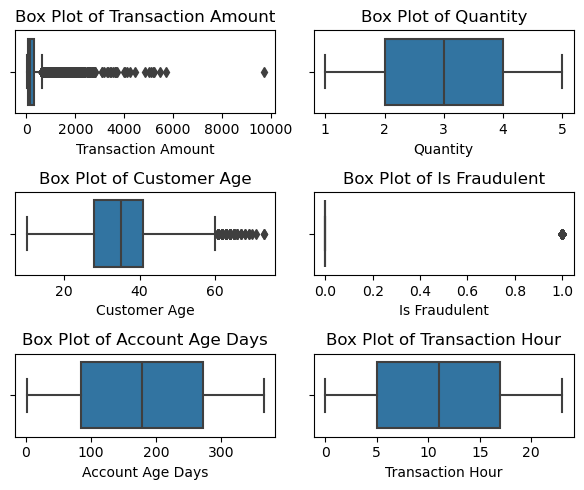

In [28]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(6, 5))
axes = axes.flatten()

for i, feature in enumerate(num_cols):
    sns.boxplot(x=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

In [11]:
mean_age = df['Customer Age'].mean()
print(mean_age)
df.loc[df['Customer Age'] < 10, 'Customer Age'] = mean_age

34.56020986714056


C:\Users\atanu\AppData\Local\Temp\ipykernel_18020\1258221920.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '34.56020986714056' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Customer Age'] < 10, 'Customer Age'] = mean_age


Exploratory Data Analysis

In [12]:
cat_cols = list(df.select_dtypes(['object']).columns)
del_list = ['Transaction ID', 'Customer ID', 'Transaction Date', 'Customer Location','IP Address', 'Shipping Address', 'Billing Address']
for x in del_list:
    cat_cols.remove(x)
print (cat_cols)


['Payment Method', 'Product Category', 'Device Used']


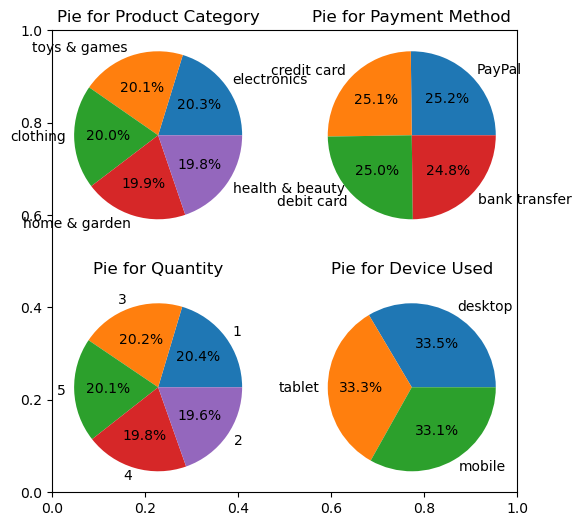

In [14]:
# figsize() function to adjust the size
# of function
plt.subplots(figsize=(6, 6))
 
# using subplot function and creating 
# plot one
plt.subplot(2, 2, 1)
plt.pie(df['Product Category'].value_counts(), labels=df['Product Category'].unique(), autopct='%1.1f%%')
plt.title('Pie for Product Category')

 
# using subplot function and creating plot two
plt.subplot(2, 2, 2)
plt.pie(df['Payment Method'].value_counts(), labels=df['Payment Method'].unique(), autopct='%1.1f%%')
plt.title('Pie for Payment Method')

 
plt.subplot(2, 2, 3)
plt.pie(df['Quantity'].value_counts(), labels=df['Quantity'].unique(), autopct='%1.1f%%')
plt.title('Pie for Quantity')

plt.subplot(2, 2, 4)
plt.pie(df['Device Used'].value_counts(), labels=df['Device Used'].unique(), autopct='%1.1f%%')
plt.title('Pie for Device Used')


# show plot
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


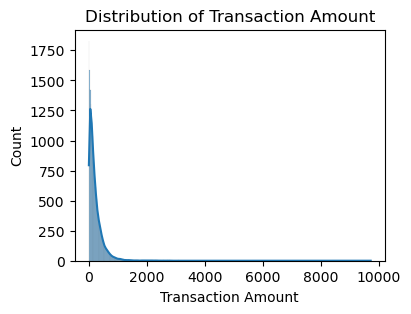

In [15]:
plt.figure(figsize=(4, 3))
sns.histplot(df['Transaction Amount'], kde=True)
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.title('Distribution of Transaction Amount')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


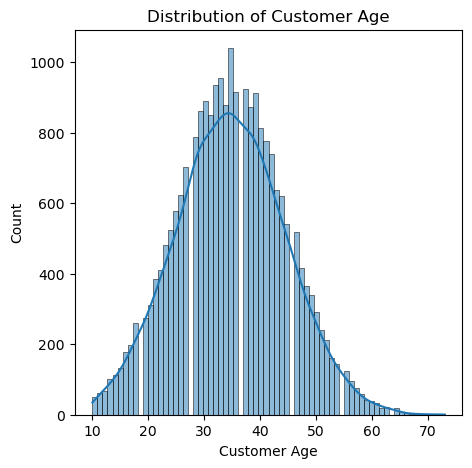

In [17]:
plt.figure(figsize=(5, 5))
sns.histplot(df['Customer Age'], kde=True)
plt.xlabel('Customer Age')
plt.ylabel('Count')
plt.title('Distribution of Customer Age')
plt.show()

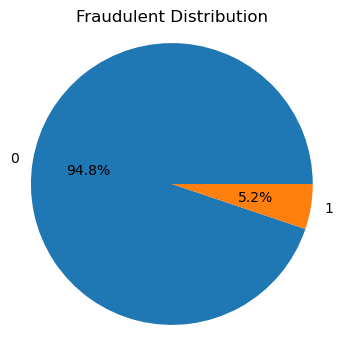

In [19]:
plt.figure(figsize=(4, 4))
plt.pie(df['Is Fraudulent'].value_counts(), labels=df['Is Fraudulent'].unique(), autopct='%1.1f%%')
plt.title('Fraudulent Distribution')
plt.axis('equal')
plt.show()

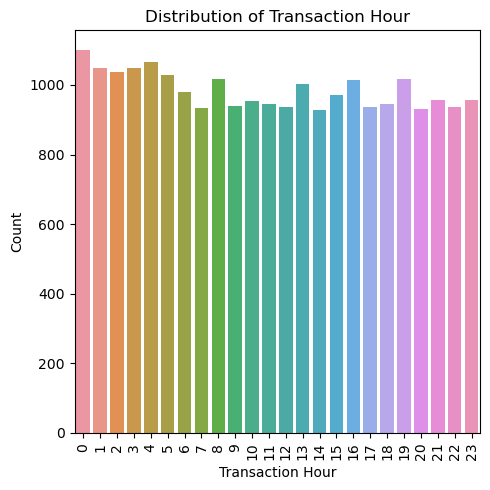

In [20]:
plt.figure(figsize=(5, 5))
sns.countplot(x='Transaction Hour', data=df)
plt.xlabel('Transaction Hour')
plt.ylabel('Count')
plt.title('Distribution of Transaction Hour')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [21]:


fraud_groups = df.groupby('Is Fraudulent')



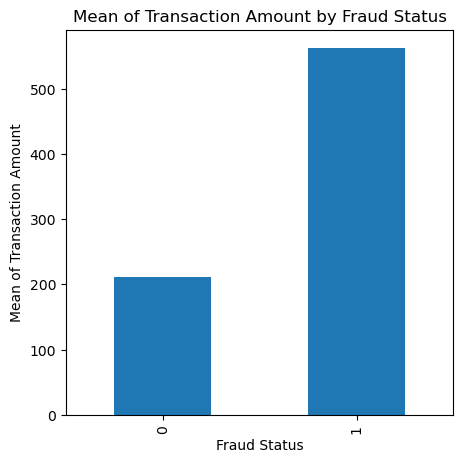

In [22]:


feature_mean = fraud_groups['Transaction Amount'].mean()
plt.figure(figsize=(5, 5))
feature_mean.plot(kind='bar')
plt.xlabel('Fraud Status')
plt.ylabel('Mean of Transaction Amount')
plt.title('Mean of Transaction Amount by Fraud Status')
plt.show()



<Axes: >

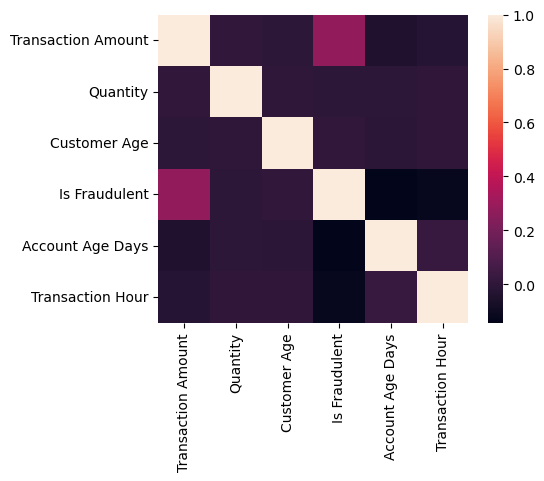

In [26]:
plt.figure(figsize=(5,4))
sns.heatmap(df[num_cols].corr())

Model Fitting

In [24]:
df.dtypes

Transaction ID         object
Customer ID            object
Transaction Amount    float64
Transaction Date       object
Payment Method         object
Product Category       object
Quantity                int64
Customer Age          float64
Customer Location      object
Device Used            object
IP Address             object
Shipping Address       object
Billing Address        object
Is Fraudulent           int64
Account Age Days        int64
Transaction Hour        int64
dtype: object

In [25]:
features = ['Transaction Amount', 'Payment Method', 'Product Category', 'Quantity', 'Customer Age', 'Device Used', 'Account Age Days', 'Transaction Hour']
x = df[features]
y = df['Is Fraudulent']

In [180]:
categorical_cols = ['Payment Method', 'Product Category', 'Device Used'] 
x = pd.get_dummies(x, columns = categorical_cols)

In [181]:
x.head()

,Transaction Amount,Quantity,Customer Age,Account Age Days,Transaction Hour,Payment Method_PayPal,Payment Method_bank transfer,Payment Method_credit card,Payment Method_debit card,Product Category_clothing,Product Category_electronics,Product Category_health & beauty,Product Category_home & garden,Product Category_toys & games,Device Used_desktop,Device Used_mobile,Device Used_tablet
0,42.32,1,40.0,282,23,True,False,False,False,False,True,False,False,False,True,False,False
1,301.34,3,35.0,223,0,False,False,True,False,False,True,False,False,False,False,False,True
2,340.32,5,29.0,360,8,False,False,False,True,False,False,False,False,True,True,False,False
3,95.77,5,45.0,325,20,False,False,True,False,False,True,False,False,False,False,True,False
4,77.45,5,42.0,116,15,False,False,True,False,True,False,False,False,False,True,False,False


In [185]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, test_size=0.2)

In [186]:
from sklearn.ensemble import RandomForestClassifier
classifier_model = RandomForestClassifier(n_estimators = 10, random_state = 0)
classifier_model.fit(train_x,train_y) 

RandomForestClassifier(n_estimators=10, random_state=0)

In [187]:
from sklearn.metrics import accuracy_score
predictions = classifier_model.predict(test_x)
accuracy_score(test_y, predictions)

0.9553628093928496